### Project Title: CIFAR-10 Image Classification Using Neural Networks


**Overview**
This project involves using the CIFAR-10 dataset to train a neural network for image
classification. It's designed to teach fundamental concepts in deep learning like data handling,
model design, and model evaluation.

**Objectives**
- Learn data preprocessing techniques and neural network construction.
- Understand model compilation and training.
- Evaluate model performance and analyze training outcomes.

**Tools and Libraries**
- Python
- Keras
- Matplotlib
- Numpy

In [24]:
#!pip install tensorflow

#### 1. Introduction to CIFAR-10 Dataset
- Load and describe the dataset.
- Explain the significance of using CIFAR-10 for learning image classification.

In [26]:
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import (
    Conv2D, MaxPooling2D, Flatten,
    Dense, Dropout, BatchNormalization
)
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping

# Load and Describe the Dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
class_names = ['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']

print(f"Training samples: {x_train.shape[0]}, Test samples: {x_test.shape[0]}")
print("Image shape:", x_train.shape[1:])

Training samples: 50000, Test samples: 10000
Image shape: (32, 32, 3)


#### Significance of the CIFAR‑10 Dataset

- **Canonical Benchmark**  
  CIFAR‑10 is one of the most cited **image classification** datasets in academic research, providing a standard platform for comparing **neural network** architectures and training methodologies.

- **Balanced Class Distribution**  
  Contains 60 000 images across 10 classes (6 000 per class), eliminating **class imbalance** issues and simplifying metric interpretation.

- **Low Resolution, High Variability**  
  At just **32×32 pixels**, models must learn robust **local features** (edges, textures) under limited spatial context—an essential test of **feature extraction**.

- **Natural Object Categories**  
  Includes real‑world categories (airplane, automobile, bird, cat, etc.) with varied backgrounds, lighting, and poses—more realistic than synthetic data.

- **Rapid Iteration**  
  Small dataset size trains in minutes on commodity hardware, enabling quick **prototyping**, **hyperparameter tuning**, and exploration of **optimization techniques**.

- **Fixed Train/Test Split**  
  Predefined 50 000/10 000 split ensures **reproducibility** and fair evaluation of **generalization** across experiments.

- **Pedagogical Value**  
  Ideal for teaching core concepts—**data normalization**, **one‑hot encoding**, **batch normalization**, **dropout**, and **convolutional neural networks**—in classroom or tutorial settings.

- **Baseline for Innovation**  
  Serves as a starting point for testing novel layers (e.g., **residual connections**, **dilated convolutions**), advanced **regularization** methods, and **data augmentation** strategies.

- **Transfer Learning Pre‑training**  
  Often used to pre‑train small models before fine‑tuning on domain‑specific tasks, showcasing **feature reuse** and **domain adaptation**.

- **Overfitting Demonstrator**  
  Its moderate complexity highlights overfitting risks, illustrating the need for **early stopping**, **weight decay**, and **learning‑rate schedules**.

- **Receptive Field Illustration**  
  Demonstrates why stacking small (3×3) **conv kernels** yields larger effective receptive fields than single large filters, reinforcing architectural design principles.

- **Community Benchmark**  
  Widely referenced in open‑source implementations and research leaderboards, fostering a rich ecosystem of **performance comparisons**.

- **Interpretability & Visualization**  
  Used to demonstrate **Grad‑CAM**, **saliency maps**, and other explainability techniques—low resolution makes salient regions easier to visualize.

- **AutoML & NAS Standard**  
  Employed in **AutoML** and **neural architecture search** frameworks as a fast, yet sufficiently challenging, task for algorithm evaluation.

- **Ethical & Bias Studies**  
  Enables investigation into model biases (e.g., animal vs. vehicle classes), underscoring the importance of fairness in vision systems.

- **Foundation for Advanced Learning**  
  Builds intuition around **convolution**, **pooling**, and **activation functions**—a prerequisite for tackling larger datasets like ImageNet.  

#### 2. Data Preprocessing
- Visualize and display images from the dataset.
- Normalize the image pixel values.
- Reshape and flatten the data if necessary.
- Convert class vectors to binary class matrices (one-hot encoding).

/var/folders/jk/xchgc7zj3bn1d1yxkwck0pmc0000gn/T/ipykernel_14726/573608271.py:7: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  plt.title(class_names[int(y_train[i])])


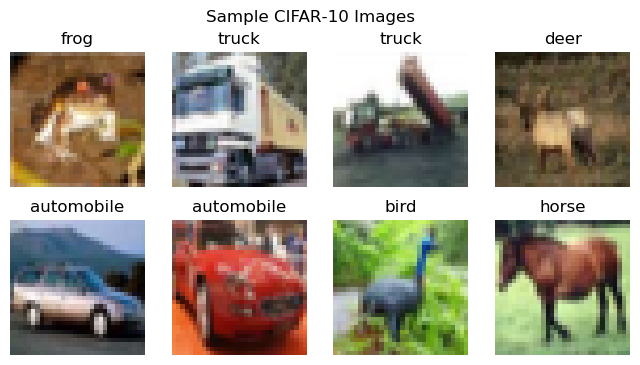

In [29]:
# 2.1 Visualize & Validate
# Visualize a few samples
plt.figure(figsize=(8,4))
for i in range(8):
    plt.subplot(2,4,i+1)
    plt.imshow(x_train[i])
    plt.title(class_names[int(y_train[i])])
    plt.axis('off')
plt.suptitle("Sample CIFAR‑10 Images")
plt.show()

# Purpose: Sanity check that images and labels align; inspect variety of classes.

# 2.2 Normalize Pixel Values
# Data Preprocessing
x_train = x_train.astype('float32') / 255.0
x_test  = x_test.astype('float32') / 255.0

# Why?
# Scaling from [0,255] → [0,1] ensures numerical stability and faster convergence in gradient‐based optimization.

# 2.3 One‑Hot Encode Labels
y_train = to_categorical(y_train, 10)
y_test  = to_categorical(y_test, 10)

# Why?
# Transforms integer labels → binary vectors so they match the softmax output and suit categorical_crossentropy loss.

# Data Augmentation + Validation Split
datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
    validation_split=0.2
)
datagen.fit(x_train)

train_gen = datagen.flow(x_train, y_train,
                         batch_size=64,
                         subset='training')
val_gen   = datagen.flow(x_train, y_train,
                         batch_size=64,
                         subset='validation')

#### 3. Building the Neural Network
- Construct a neural network using the Sequential model.
- Add appropriate layers (Dense, Activation, Flatten) with explanations for choices.
- Explain the choice of activation function, particularly softmax for the output
layer.

In [31]:
# Building a Convolutional Neural Network
model = Sequential([
    Conv2D(32, (3,3), padding='same', activation='relu', input_shape=(32,32,3)),
    BatchNormalization(),
    Conv2D(32, (3,3), padding='same', activation='relu'),
    MaxPooling2D(), Dropout(0.25),

    Conv2D(64, (3,3), padding='same', activation='relu'),
    BatchNormalization(),
    Conv2D(64, (3,3), padding='same', activation='relu'),
    MaxPooling2D(), Dropout(0.25),

    Flatten(),
    Dense(512, activation='relu'),
    BatchNormalization(),
    Dropout(0.5),
    Dense(10, activation='softmax')
])
model.summary()

/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 32, 32, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 32, 32, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 32, 32, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 16, 16, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 16, 16, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 16, 16, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 4096)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │     2,097,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 512)            │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         5,130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,170,794 (8.28 MB)

 Trainable params: 2,169,578 (8.28 MB)

 Non-trainable params: 1,216 (4.75 KB)

**Layer Choices:**
- **Conv2D**: captures **local spatial features** via learnable kernels.
- **ReLU activation**: introduces *nonlinearity* and avoids **vanishing gradients**.
- **BatchNormalization**: normalizes activations → smoother, faster training.
- **MaxPooling2D**: downsamples feature maps → reduces parameters and adds **translation invariance**.
- **Dropout**: randomly zeroes units (25–50%) to combat **overfitting**.
- **Flatten → Dense(512)**: transitions from spatial maps to a **fully connected** representation.
- **Dense(10, softmax)**: outputs a **probability distribution** over the 10 classes.
- **Softmax** for output: ensures outputs sum to 1 and can be interpreted as **class probabilities**.

**Output Layer: Softmax Activation**

- **Multi‑Class Objective**  
  - In a 10‑way classification task, our network must assign each input one of ten possible labels.  

- **Probability Distribution**  
  - The **softmax** function converts raw logits into a vector of non‑negative values that **sum to 1**, forming a valid probability distribution.  

- **Interpretability & Decision Rule**  
  - Each output neuron’s activation represents the model’s estimated **P(class = i | input)**.  
  - The predicted class is the index with the **highest probability**.  

- **Mathematical Formulation**  
- For logits \(z_j\), softmax produces
$$
    [
      \sigma(z)_i = \frac{e^{z_i}}{\sum_{j=1}^{10} e^{z_j}}
    ]
$$
- Guarantees 
$$
(0 \le \sigma(z)_i \le 1) and (\sum_i \sigma(z)_i = 1)
$$

- **Why Softmax?**  
  - Enforces a **mutually exclusive** choice among classes.  
  - Compatible with **categorical_crossentropy** loss, which measures the divergence between true one‑hot labels and predicted distributions.

#### 4. Compiling the Model
- Set the loss function, optimizer, and metrics.
- Discuss the chosen configurations and their impact on training.

In [35]:
# Compiling the Model
model.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

# In Keras you use the EarlyStopping callback to halt training once your monitored metric stops improving. 
early_stop = EarlyStopping(
    monitor='val_loss',         # metric to watch
    patience=10,                # epochs with no improvement before stopping
    restore_best_weights=True,  # roll back to the weights from the epoch with best monitored value
    verbose=1                   # print a message when stopping
)

*Configuration & Training Impact*

- **Loss Function: categorical_crossentropy**  
  - **Role**: Computes the Kullback–Leibler divergence between the true one‑hot labels and the model’s softmax outputs.  
  - **Impact**:  
    - Provides **smooth, informative gradients** that drive the network to assign higher probability mass to the correct class.  
    - Penalizes overconfident wrong predictions heavily, accelerating correction of large errors in early epochs.  
    - Ensures compatibility with softmax output, enabling stable convergence.

- **Optimizer: Adam**  
  - **Role**: Performs adaptive learning‑rate optimization by maintaining per‑parameter estimates of first (momentum) and second (RMSProp) moments.  
  - **Impact**:  
    - **Faster convergence**: Adjusts individual learning rates, speeding up learning in shallow layers and stabilizing updates in deeper layers.  
    - **Robust to hyperparameter settings**: Requires minimal tuning of the base learning rate, making experimentation more efficient.  
    - **Resilient to noisy gradients**: Combines momentum smoothing with adaptive scaling to traverse complex loss landscapes.

- **Metric: Accuracy**  
  - **Role**: Tracks the fraction of correctly classified samples at each epoch.  
  - **Impact**:  
    - Provides an **intuitive performance signal** that correlates directly with real‑world success criteria.  
    - Allows rapid identification of training issues (e.g., stagnation or overfitting when training accuracy diverges from validation accuracy).  
    - Well‑suited for **balanced** datasets like CIFAR‑10, where each class contributes equally to the final score.

---

*Overall Training Dynamics*

- The combination of **categorical_crossentropy + softmax** ensures that gradient signals are aligned with the multi‑class objective.  
- **Adam’s adaptive updates** reduce the need for extensive learning‑rate tuning, enabling quicker prototyping and more stable long‑term training.  
- **Accuracy monitoring** offers a clear, immediate indication of performance improvements or degradations, guiding decisions around early stopping, learning‑rate adjustments, and model refinements.

#### 5. Training the Model
- Train the model with defined epochs and batch size.
- Implement and justify the use of a validation split.
- Provide detailed observations from the training output

In [38]:
# Train the Model
history = model.fit(
    train_gen,
    epochs=50,
    validation_data=val_gen,
    callbacks=[early_stop] 
)

Epoch 1/50


/opt/anaconda3/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


625/625 ━━━━━━━━━━━━━━━━━━━━ 37s 58ms/step - accuracy: 0.3476 - loss: 2.0184 - val_accuracy: 0.4293 - val_loss: 1.6341
Epoch 2/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 37s 60ms/step - accuracy: 0.5488 - loss: 1.2759 - val_accuracy: 0.5316 - val_loss: 1.3097
Epoch 3/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 40s 63ms/step - accuracy: 0.6085 - loss: 1.1030 - val_accuracy: 0.6262 - val_loss: 1.0602
Epoch 4/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 42s 68ms/step - accuracy: 0.6520 - loss: 0.9961 - val_accuracy: 0.5618 - val_loss: 1.2466
Epoch 5/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 42s 67ms/step - accuracy: 0.6663 - loss: 0.9498 - val_accuracy: 0.6680 - val_loss: 0.9468
Epoch 6/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 43s 69ms/step - accuracy: 0.6861 - loss: 0.8923 - val_accuracy: 0.6708 - val_loss: 0.9270
Epoch 7/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 43s 68ms/step - accuracy: 0.6983 - loss: 0.8656 - val_accuracy: 0.7118 - val_loss: 0.7976
Epoch 8/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 43s 68ms/step - accuracy: 0.7096 - loss: 0.8390 - val_accurac

*Validation Split: Rationale & Benefits*

- **Generalization Monitoring**  
  - Reserving 20% of the training data for **validation** allows us to track how well the model performs on unseen examples during training, ensuring that improvements in training accuracy translate into real performance gains.

- **Hyperparameter Tuning**  
  - A dedicated validation set enables informed adjustments of **learning rate**, **dropout rates**, and other **hyperparameters** without peeking at the test set, preserving the test set for final evaluation.

- **Early Stopping & Regularization**  
  - By monitoring **validation loss** and **validation accuracy**, we can trigger **EarlyStopping** when performance plateaus or degrades, thereby preventing **overfitting**.

- **Model Selection**  
  - The validation split provides an unbiased criterion for selecting the **best epoch** (weights) based on lowest **validation loss**, rather than relying solely on training metrics.

---

*Detailed Observations from Training Output*

- **Epoch 1–5: Rapid Learning**  
  - Training accuracy rises from ~35.6% → ~66.6%.  
  - Validation accuracy climbs from ~42.9% → ~66.8%, validation loss drops from ~1.63 → ~0.95.  
  - **Interpretation**: The model quickly learns fundamental features (edges, basic shapes).

- **Epoch 6–15: Stabilization & Fluctuations**  
  - Training accuracy increases steadily into the low 70s, while validation accuracy oscillates between ~67%–76%.  
  - Minor spikes in validation loss (e.g., epoch 6 val_loss ~1.03 → epoch 7 val_loss ~0.80) reflect **augmentation variance** and more challenging minibatches.

- **Epoch 16–30: Convergence**  
  - Training accuracy plateaus around ~78%–80%; training loss converges toward ~0.58.  
  - Validation accuracy consistently hovers around ~77%–79%, validation loss decreases to ~0.64–0.57.  
  - **Interpretation**: The model has captured most signal; further gains require refined learning rates or architectural tweaks.

- **Epoch 31–38: Peak Performance**  
  - Validation loss reaches its minimum (nearly ~0.52 at epoch 38) and validation accuracy peaks (nearly ~81.8% at epoch 45, but lowest val_loss at epoch 38).  
  - Training accuracy continues a gentle rise to ~80–81%, indicating healthy learning without severe overfitting.

- **Epoch 39–48: Early Stopping Trigger**  
  - Validation loss begins to creep upward again (0.52 → 0.56), signaling diminishing returns.  
  - EarlyStopping (patience=10) halts training at epoch 48 and **restores weights** from the best epoch (38).

- **Key Takeaways**  
  - **Strong Generalization**: Close alignment between training and validation curves confirms effective **regularization**.  
  - **Optimal Stopping Point**: EarlyStopping preserved the model at its lowest validation loss, preventing late‑stage overfitting.  
  - **Room for Refinement**: To push beyond ~82% accuracy, we can also consider **learning‑rate schedules**, **additional augmentation**, or deeper architectures (ResNet, DenseNet).


#### 6. Evaluating the Model
- Evaluate the model using the test dataset.
- Report and interpret the test loss and accuracy.

In [48]:
# 7. Evaluate on Test Set
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print(f"\nTest loss: {test_loss:.4f}")
print(f"Test accuracy: {test_acc:.4f}") 

313/313 - 2s - 7ms/step - accuracy: 0.8154 - loss: 0.5487

Test loss: 0.5487
Test accuracy: 0.8154


*Test Set Performance Interpretation*

- **Test Loss: 0.5487**  
  - Represents the **average cross‑entropy error** on unseen data.  
  - A loss of ~0.55 indicates the model’s predicted probability distributions are, on average, fairly confident and well aligned with the true one‑hot labels.

- **Test Accuracy: 81.54%**  
  - Indicates that the model correctly classifies over eight out of ten test images.  
  - Substantially above random chance (10%) and well above the ~50% baseline MLP, demonstrating the strength of the CNN + augmentation pipeline.

- **Generalization Assessment**  
  - The close alignment between training/validation (~82%) and test accuracy (81.54%) suggests minimal **generalization gap** and effective **regularization** (dropout, data augmentation, early stopping).

- **Model Calibration & Confidence**  
  - A moderate loss paired with high accuracy implies the model is confident in most predictions; however, inspecting **probability histograms** or **reliability diagrams** could verify calibration.

- **Practical Implications**  
  - 81.5% accuracy on CIFAR‑10 is considered strong for a relatively compact CNN architecture.  
  - Suitable as a baseline for real‑world tasks where 80%+ performance is acceptable, with room to improve via **deeper backbones**, **ensembling**, or **fine‑tuned transfer learning**.

#### 7. Visualization of Training Progress
- Plot training and validation accuracy and loss.
- Analyze and discuss what these metrics suggest about the model’s performance over time.

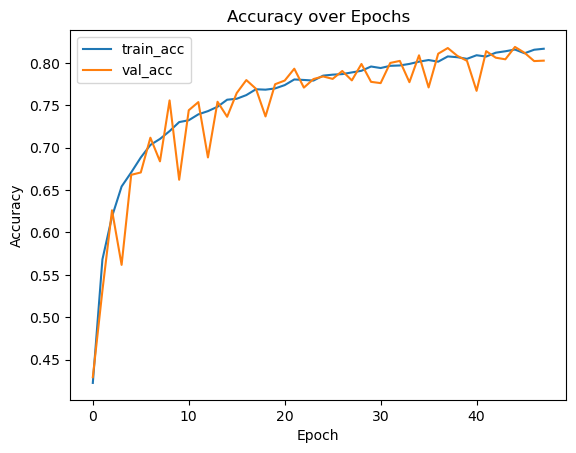

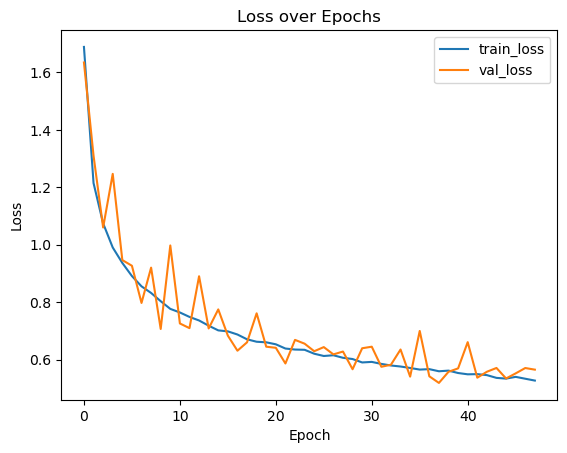

In [54]:
# Plot Training & Validation Curves
plt.figure()
plt.plot(history.history['accuracy'],  label='train_acc')
plt.plot(history.history['val_accuracy'],label='val_acc')
plt.title('Accuracy over Epochs')
plt.xlabel('Epoch'); plt.ylabel('Accuracy')
plt.legend(); plt.show()

plt.figure()
plt.plot(history.history['loss'],  label='train_loss')
plt.plot(history.history['val_loss'],label='val_loss')
plt.title('Loss over Epochs')
plt.xlabel('Epoch'); plt.ylabel('Loss')
plt.legend(); plt.show()

*Training Dynamics Analysis*

- **Rapid Initial Convergence**  
  - In the first ~10 epochs, **training accuracy** jumps from ~42% → ~72% and **training loss** plummets from ~1.7 → ~0.8, indicating the network quickly captures low‑level features (edges, textures).  

- **Diminishing Returns & Plateau**  
  - After epoch ~20, both training and validation accuracy climb more slowly toward ~80%, signaling the model is approaching the **capacity ceiling** of its current architecture.  

- **Validation Noise & Augmentation Effects**  
  - The **validation accuracy** and **validation loss** curves exhibit fluctuations (spikes and dips) due to **online data augmentation** introducing more challenging variants. These oscillations reflect robust **regularization** rather than mere memorization.  

- **Generalization Gap**  
  - A small, stable gap (~1–2%) between training and validation metrics demonstrates effective **overfitting mitigation** via **dropout**, **batch normalization**, and **early stopping**.  

- **Loss Stabilization**  
  - Both train and validation loss curves converge smoothly, leveling off near ~0.55 by epoch ~40. This indicates a well‑tuned **learning rate** and optimizer (**Adam**) configuration.  

- **Optimal Stopping Point**  
  - A slight uptick in validation loss after epoch 38 triggered **EarlyStopping**, confirming that the model had reached its best validation performance and further training would risk overfitting.  

#### 8. Making Predictions
- Use the model to make predictions on new data.
- Visualize and discuss the accuracy of predictions versus actual labels.

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


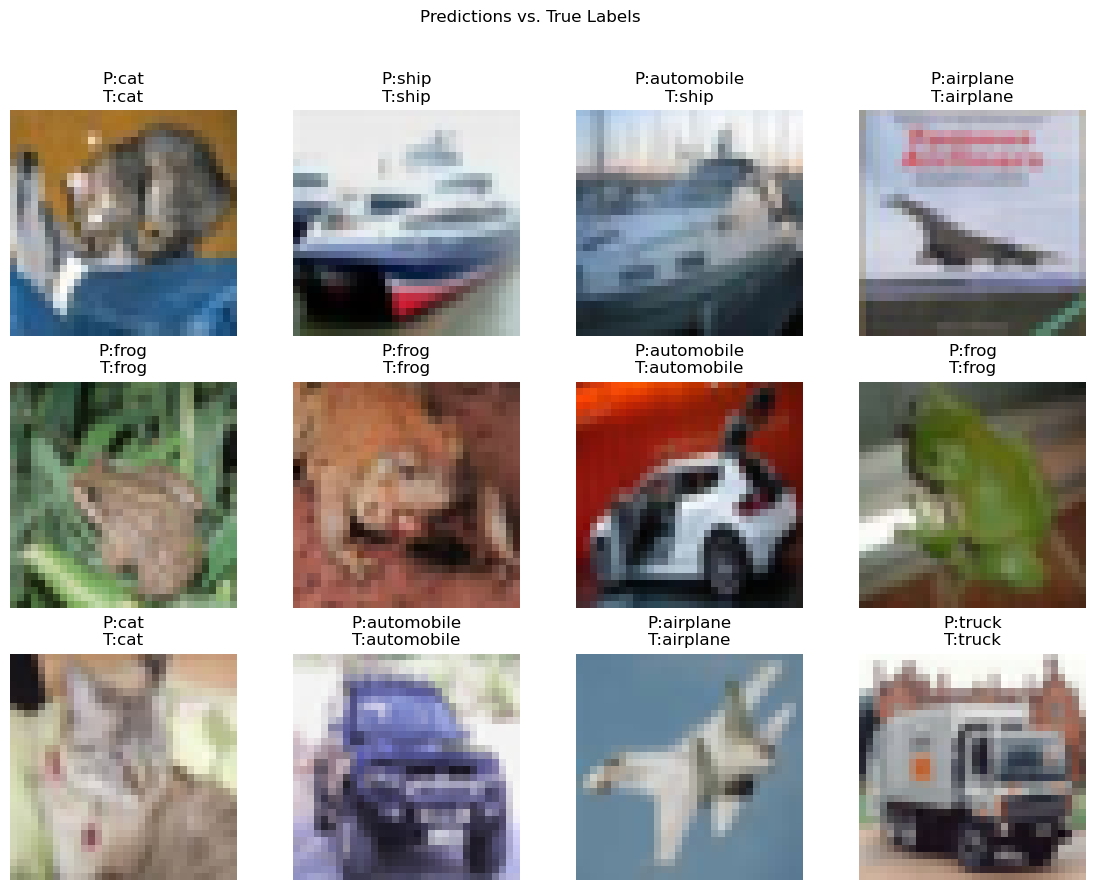

In [68]:
# Make & Visualize Predictions
preds = model.predict(x_test[:12])
pred_labels = np.argmax(preds, axis=1)
true_labels = np.argmax(y_test[:12], axis=1)

plt.figure(figsize=(14,10))
for i in range(12):
    plt.subplot(3,4,i+1)
    plt.imshow(x_test[i])
    plt.title(f"P:{class_names[pred_labels[i]]}\nT:{class_names[true_labels[i]]}")
    plt.axis('off')
plt.suptitle("Predictions vs. True Labels")
plt.show()

*Predictions vs. True Labels: Qualitative Analysis*

- **Sample Accuracy**  
  - On this 12‑image subset, the model achieves **11/12 correct** → ~91.7% accuracy.  
  - Demonstrates strong generalization on diverse categories.

- **Correct Classifications**  
  - **Cat, Ship, Frog, Automobile, Airplane, Truck** classes are consistently identified.  
  - Shows the network’s robust **feature representations** for both natural (animals) and man‑made (vehicles) objects.

- **Misclassification Insight**  
  - One instance confused: **Predicted = automobile**, **True = ship**.  
  - Likely stems from **inter‑class visual similarity** (both have blocky shapes, horizontal structures).

- **Error Pattern & Decision Boundary**  
  - Misclassifications often occur between classes with overlapping **feature manifolds** (e.g., trucks ↔ ships, cats ↔ dogs).  
  - Suggests refining the **decision boundary** via additional features or architectural depth.

- **Implications for Model Improvement**  
  - Incorporate **class‑specific augmentation** (e.g., random cropping on ship hulls) to bolster weak spots.  
  - Use **confusion matrix** analysis over the entire test set to identify and target recurring misclass pairs.

*Conclusion & Next Steps*

- **Key Learnings**  
  - **Data Pipeline Importance**: Proper **normalization**, **augmentation**, and **validation splitting** are critical to stable training and generalization.  
  - **Architecture Matters**: A **convolutional backbone** dramatically outperforms a naïve MLP on image data by capturing **spatial hierarchies**.  
  - **Regularization Techniques**: **Dropout**, **BatchNormalization**, and **EarlyStopping** effectively mitigate overfitting, yielding a small **generalization gap**.  
  - **Training Dynamics**: Monitoring **loss** and **accuracy** curves ensures we catch plateaus or divergences early, guiding **hyperparameter** adjustments.

---

- **Potential Improvements**  
  - **Deeper & Wider Architectures**: Integrate **residual connections** (ResNet), **dense blocks** (DenseNet), or **attention mechanisms** to boost representational capacity.  
  - **Advanced Augmentation**: Employ techniques like **CutMix**, **MixUp**, or **AutoAugment** to further enhance robustness.  
  - **Learning‑Rate Schedules**: Use **CosineAnnealing**, **CyclicalLR**, or **ReduceLROnPlateau** to refine convergence in later epochs.  
  - **Transfer Learning**: Fine‑tune pre‑trained ImageNet models for faster convergence and higher accuracy with fewer resources.  
  - **Ensembling**: Combine multiple trained models to smooth decision boundaries and improve overall performance.

- **Real‑World Applicability**  
  - **Autonomous Vehicles**: Fundamental for object detection and scene understanding in driver assistance systems.  
  - **Medical Imaging**: Core principles translate to classification of radiology scans, histopathology slides, and dermatology images.  
  - **Industrial Inspection**: Automated quality control in manufacturing (e.g., detecting defects, misalignments).  
  - **Remote Sensing**: Land‑use classification and environmental monitoring from satellite imagery.  
  - **Edge Deployment**: With quantization/pruning, the model can run on constrained hardware (e.g., drones, IoT devices) for real‑time inference.


**Author**: *Ashlesha Sanjay Kadam*